In [22]:
import pandas as pd
from pandas import read_csv
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [4]:
# Task 1: Utilize Libraries/Dataset
def load_and_explore_data(file_path):
    """
    Load the dataset and perform basic exploration

    Parameters:
    file_path (str): Path to the customer data CSV file

    Returns:
    pandas.DataFrame: The loaded customer data
    """
    # Load the dataset
    df = pd.read_csv(file_path)

    # Display the first few rows
    print("First 5 rows of the dataset:")
    print(df.head())

    # Display dataset info
    print("\nDataset Information:")
    print(df.info())

    # Display basic statistics
    print("\nBasic Statistics:")
    print(df.describe())

    return df
df = load_and_explore_data('sample_data/enhanced_diabetes_dataset.csv')

First 5 rows of the dataset:
   Age  Gender  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0   52       1            1      124           95.0           20.0        0   
1   43       1            2      144           86.0           23.0        3   
2   55       1            4      141          113.0           18.0      297   
3   68       1            3      125          110.0           32.0      210   
4   41       0            0      177           92.0           14.0      189   

    BMI  DiabetesPedigreeFunction  HbA1c  FastingBS  Triglycerides   HDL  \
0  36.0                     0.078    4.7         87          142.0  37.0   
1  32.9                     0.118    6.3        135          162.0  89.0   
2  43.4                     0.139    5.4        113          180.0  45.0   
3  22.7                     0.197    5.2         93          262.0  56.0   
4  38.1                     0.078   10.5        126          332.0  66.0   

   Smoking  PhysicalActivity  Prediabet

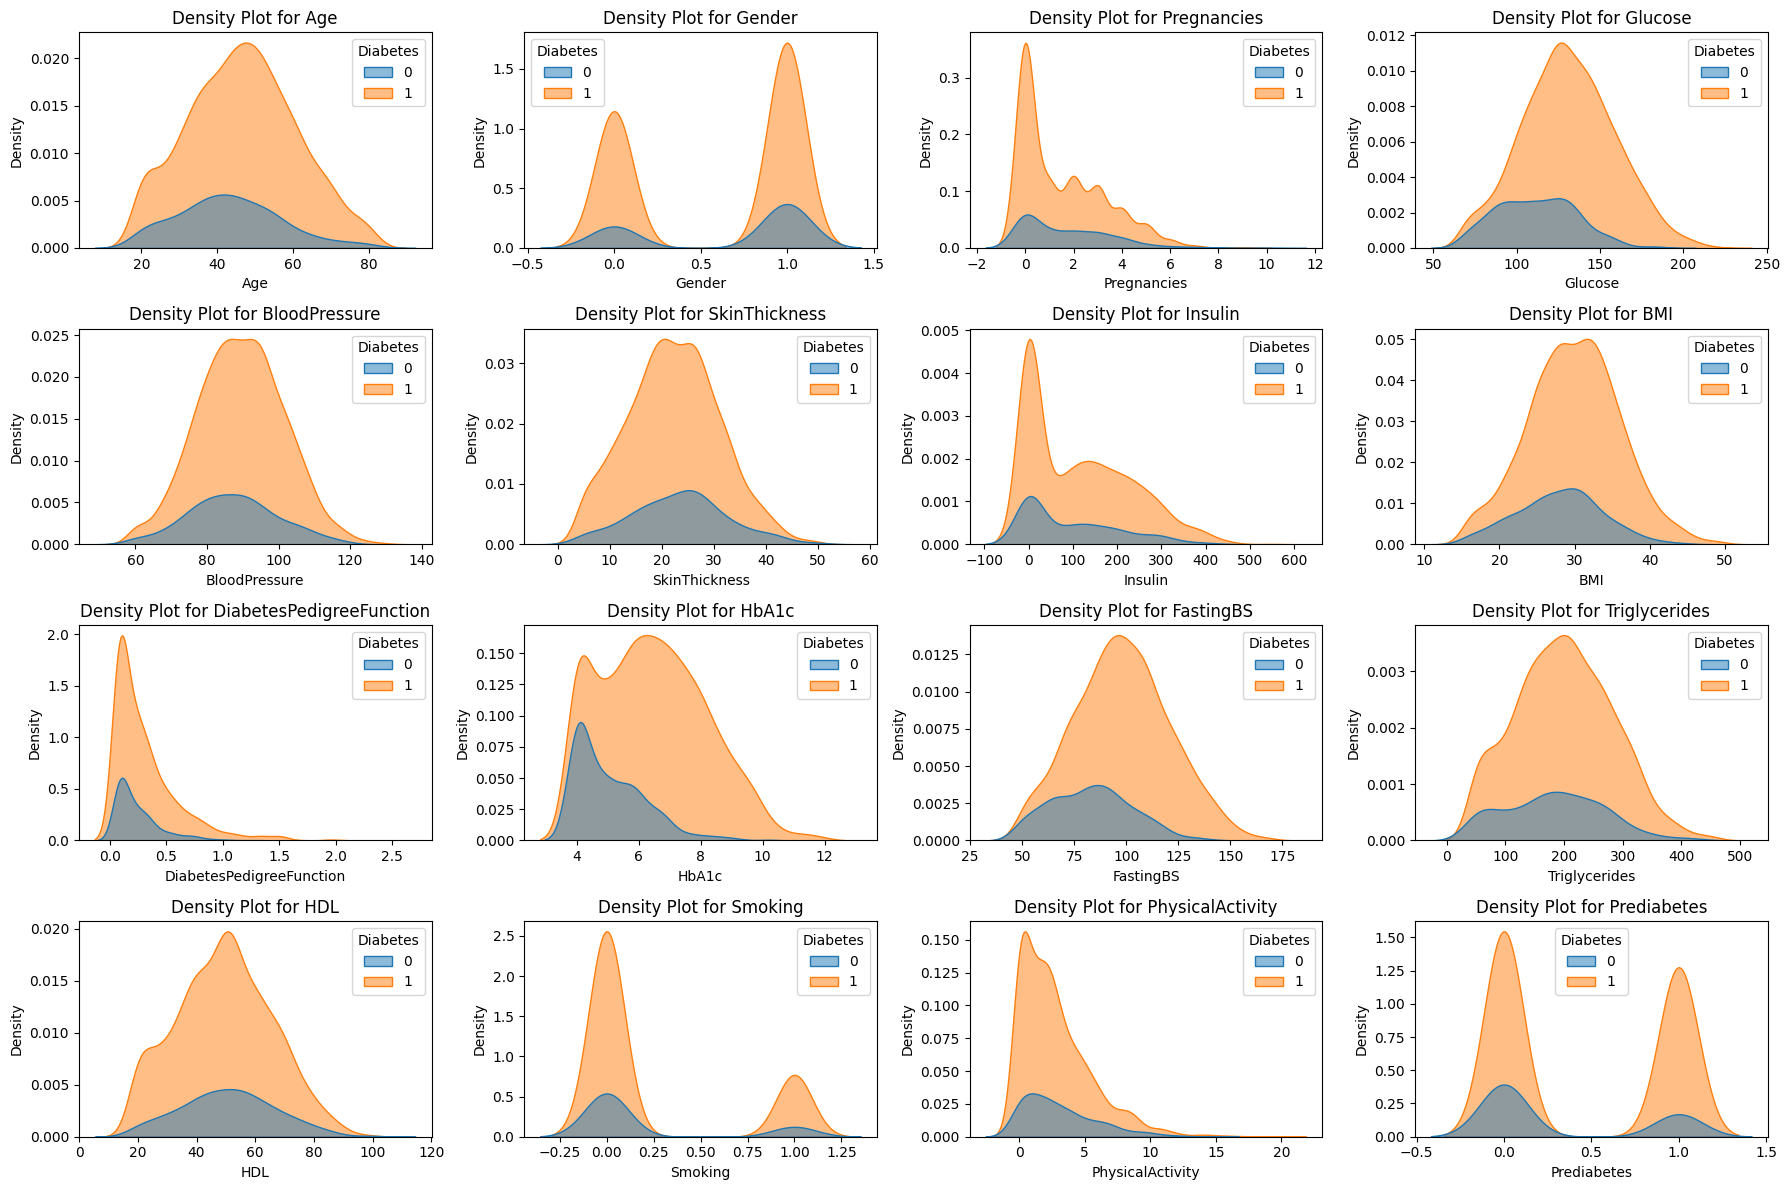

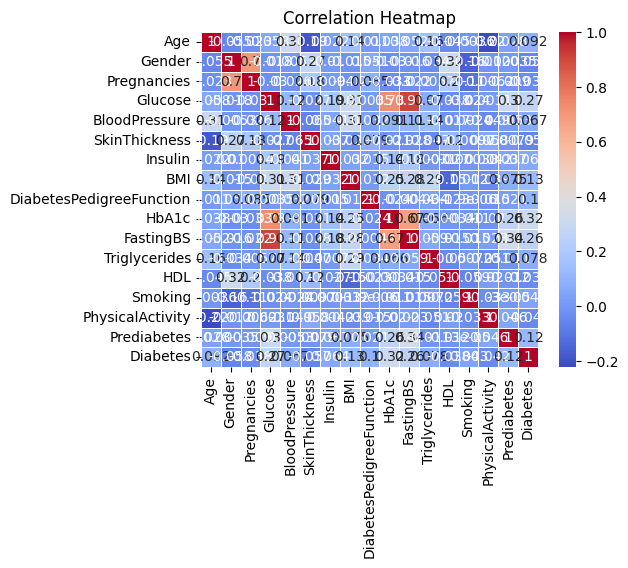

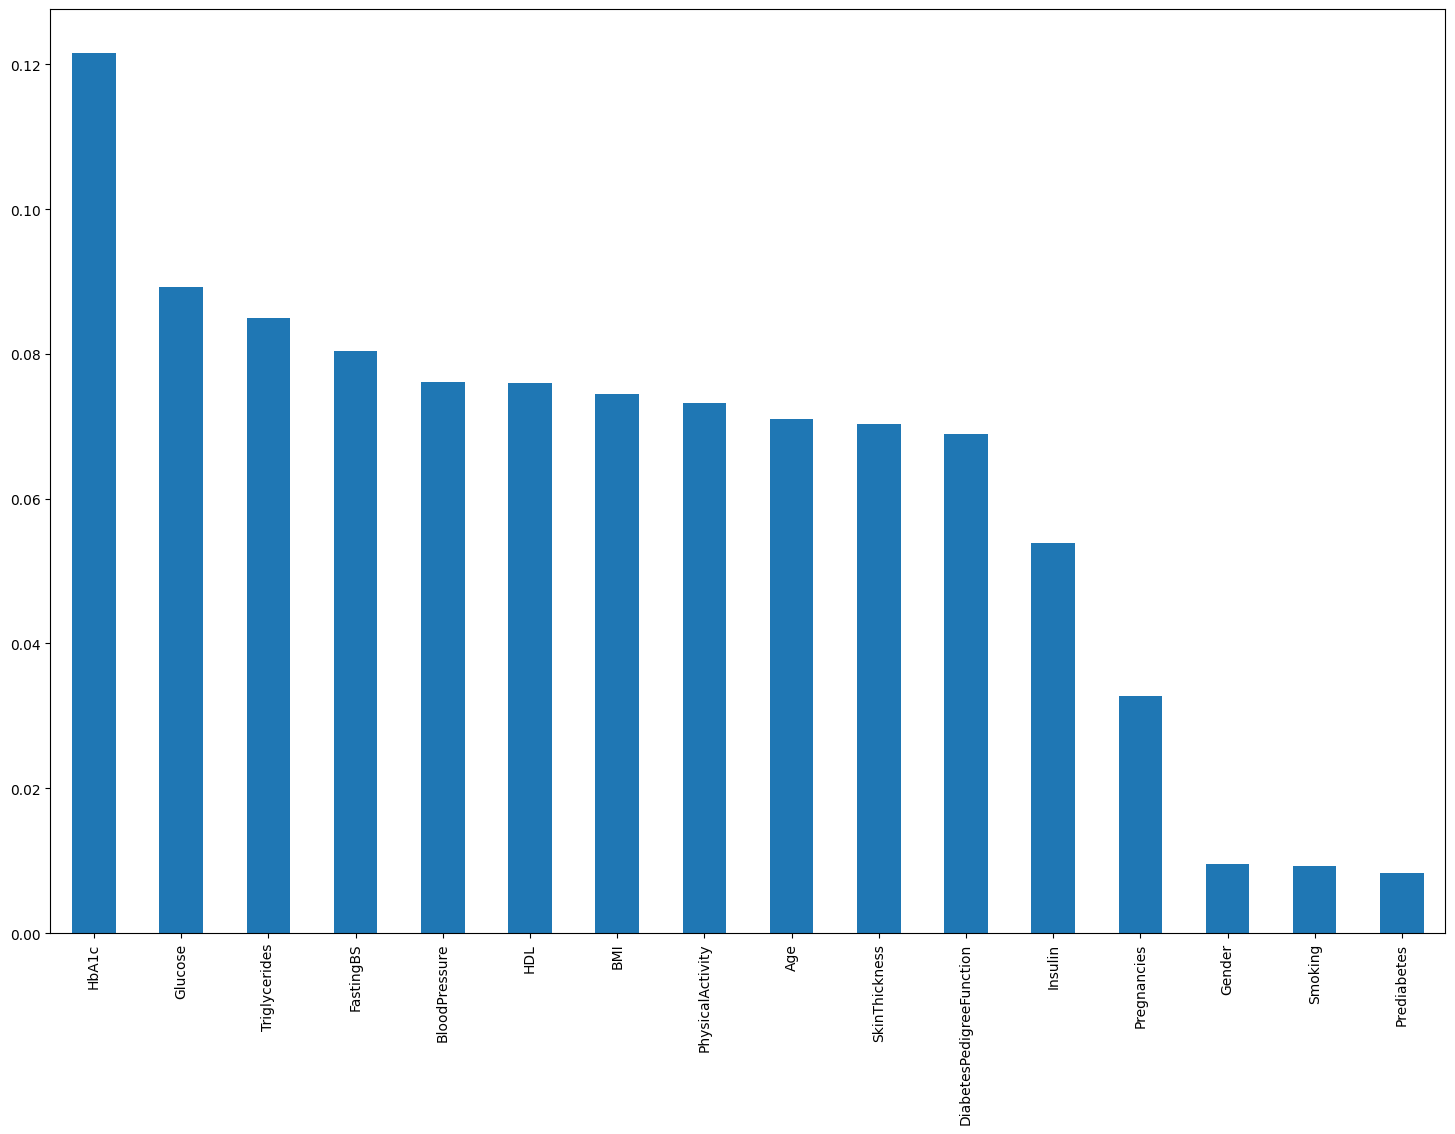

In [5]:
# Task 2: Data Visualization - EDA
def perform_eda(df):
    """
    Perform Exploratory Data Analysis on the Patient dataset

    Parameters:
    df (pandas.DataFrame): Patient dataset
    """

    # 1. Create distribution plots comparing features between diabetic and non-diabetic patients
    plt.figure(figsize=(18, 12))
    for i, column in enumerate(df.columns[:16]):  # Skip Label column
      plt.subplot(4, 4, i+1)
      sns.kdeplot(data=df, x= column, hue='Diabetes', fill=True, alpha=0.5)
      plt.title(f'Density Plot for {column}')
      plt.xlabel(f'{column}')
      plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

    # 2. Correlation heatmap
    plt.figure(figsize=(25, 20))
    plt.subplot(4, 4, 4)
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')

    # 3. Visualise feature importance using appropriate techniques
    # Create a figure for distribution plots
    plt.figure(figsize=(18, 12))
    model = RandomForestClassifier()
    X = df.iloc[:, :-1]
    y = df['Diabetes']

    model.fit(X, y)

    (pd.Series(model.feature_importances_, index=X.columns)
      .nlargest(16)
      .plot(kind='bar'))


perform_eda(df)

Missing values in each column:
Age                           0
Gender                        0
Pregnancies                   0
Glucose                       0
BloodPressure                98
SkinThickness                86
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
HbA1c                         0
FastingBS                     0
Triglycerides                91
HDL                          96
Smoking                       0
PhysicalActivity            101
Prediabetes                   0
Diabetes                      0
dtype: int64


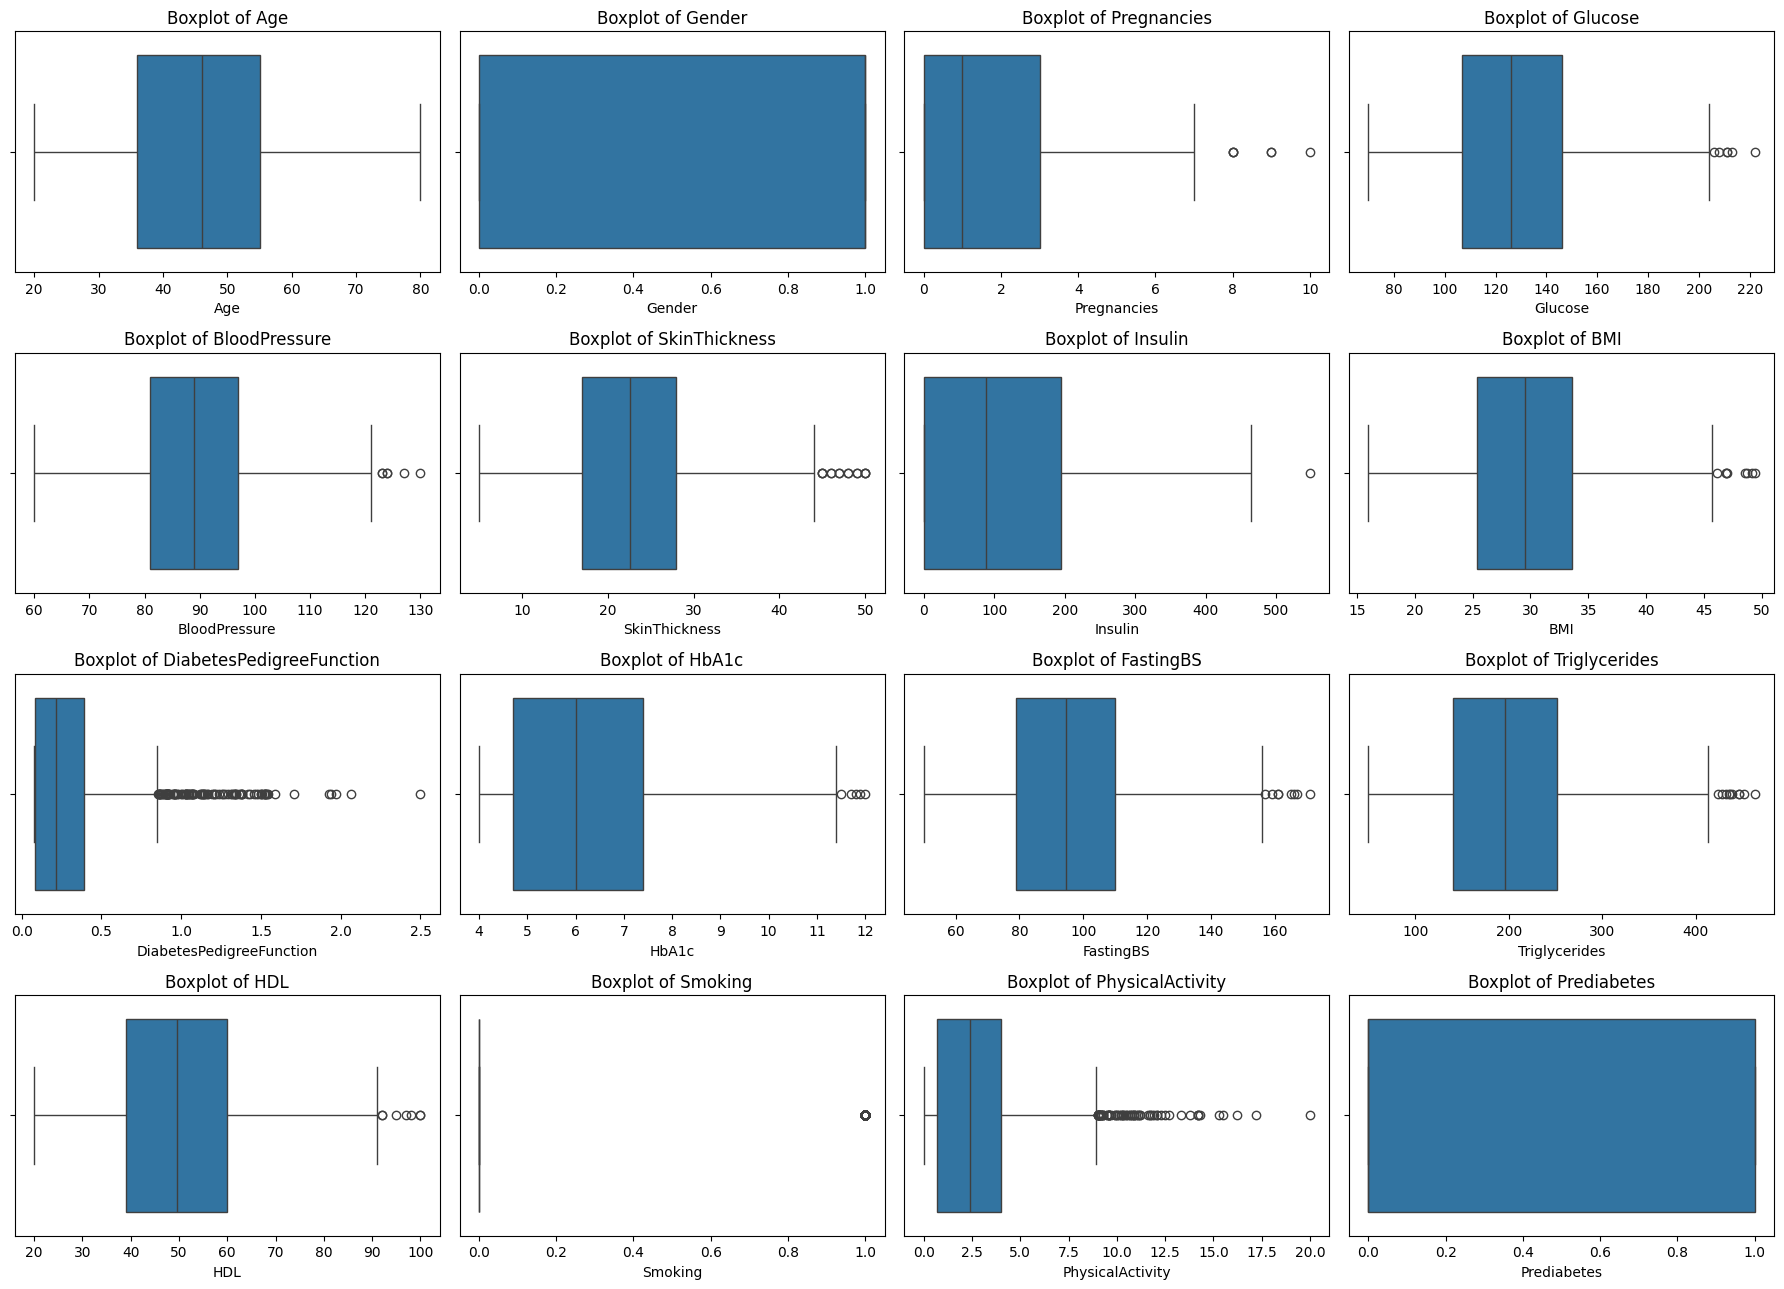


Decision on outliers: Not many outstanding ouliers therefore we will keep the outliers for now .

Decision on outliers: Not many outstanding ouliers therefore we will keep the outliers for now .
Outliers found by Z-score for Pregnancies: 9        7
35       7
44       7
177      7
268      9
303     10
563      8
908      8
1107     7
1215     7
1266     7
1605     8
1624     7
1767     9
1811     7
1835     7
1880     7
1936     7
Name: Pregnancies, dtype: int64 

Decision on outliers: Not many outstanding ouliers therefore we will keep the outliers for now .
Outliers found by Z-score for Glucose: 658     222
1070    213
Name: Glucose, dtype: int64 

Decision on outliers: Not many outstanding ouliers therefore we will keep the outliers for now .
Outliers found by Z-score for BloodPressure: 1118    130.0
1616    127.0
Name: BloodPressure, dtype: float64 

Decision on outliers: Not many outstanding ouliers therefore we will keep the outliers for now .
Outliers found by Z-score for Skin

In [6]:
# Task 3: Check for missing values and handle outliers
from scipy import stats

def check_data_quality(df):
    """
    Check for missing values and outliers in the dataset

    Parameters:
    df (pandas.DataFrame): Customer dataset

    Returns:
    pandas.DataFrame: DataFrame with outliers handled (if any)
    """
    # Check for missing values
    print("Missing values in each column:")
    print(df.isnull().sum())
    # Fill null values with mean
    df = df.fillna(df.mean(numeric_only=True))

    # Visualize outliers using boxplots
    plt.figure(figsize=(18, 13))
    for i, column in enumerate(df.columns[:-1]):  # Skip Label column
        plt.subplot(4, 4, i+1)
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

    # Handle outliers
    findAndHandleOutliers(df)
    return df

def findAndHandleOutliers(df):
  for i, column in enumerate(df.columns[:-1]):
    z_scores = np.abs(stats.zscore(df[column]))
    threshold = 3
    outliers = df[z_scores > threshold]
    if(not outliers.empty):
      print(f"Outliers found by Z-score for {column}: {outliers[column]} ")
    # Decision on outliers
    print("\nDecision on outliers: Not many outstanding ouliers therefore we will keep the outliers for now .")

df = check_data_quality(df)


In [33]:
# Task 4: Prepare Features and Target Variable
#The recommended, standard workflow is: Split -> Normalize -> SMOTE. Normalization and upsampling should happen only on training data so the test data does not influence training

X = df.drop(columns = ['Diabetes'])
y = df['Diabetes']

#Split data into training (70%), validation (15%), and test (15%) sets
X_train_val, X_test, y_train_val, y_test = train_test_split(Xs, ys, test_size=0.15, random_state=0)
# 0.15 (desired validation size) / 0.85 (remaining data size) = ~0.17647
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.17, random_state=0)

#Normalize
scaler_X = MinMaxScaler()
Xt = scaler_X.fit_transform(X_train)
Xv = scaler_X.transform(X_val)
Xtr = scaler_X.transform(X_test)

print(Xt.shape, y_train.shape)


(1411, 16) (1411, 1)


In [36]:
#Task 5: Class Imbalance

from imblearn.over_sampling import SMOTE
from collections import Counter

class_inf = Counter(y_train)
print(class_inf)

#Upsampling to balance no of normal vs diabetic samples
sm = SMOTE()
Xts, yts = sm.fit_resample(Xt, y_train)

class_inf = Counter(yts)
print(class_inf)



TypeError: unhashable type: 'numpy.ndarray'

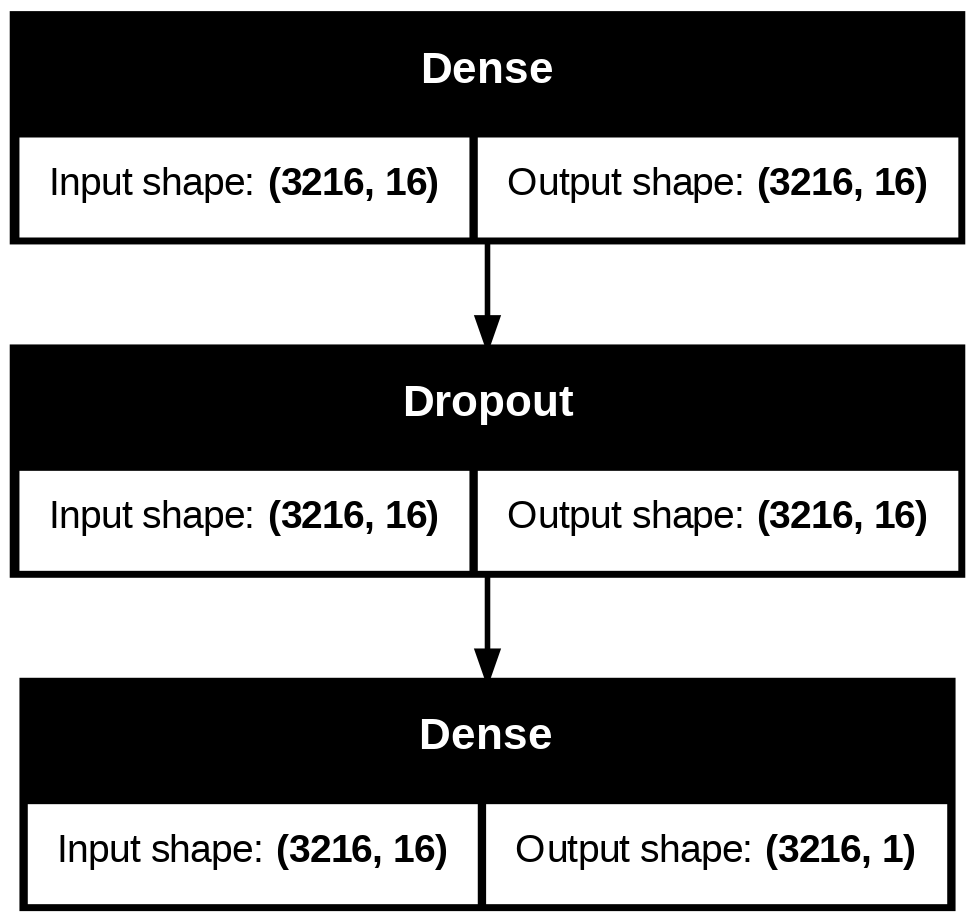

In [14]:
#Task 6: Design an Appropriate DCNN-based Architecture and Task 7: Configure
from keras.optimizers import Adam
def baseline_model():
    # create model
    model = Sequential()
    #Not adding any convolutional layers as the input is not spatial data.
    #Not adding pooling as there is no need for dimensionality reduction
    #flatten layer is not required as input is acceptable vector

    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    # model.add(Dense(12, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add( Dropout(0.2) )
    model.add(Dense(1, kernel_initializer='normal', activation = "sigmoid"))
    # Compile model
    # Instantiate an optimizer with a specific learning rate
    learning_rate = 0.001
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=["accuracy"])
    return model
model = baseline_model()
model.build(input_shape= Xs.shape)
keras.utils.plot_model(model, show_shapes=True)